In [1]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as pp

In [3]:
#See https://stackoverflow.com/questions/17821458/random-number-from-histogram for more info.

In [10]:
%matplotlib inline

In [3]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def generate_rand_from_pdf(pdf, x_grid):
    cdf = np.cumsum(pdf)
    cdf = cdf / cdf[-1]
    values = np.random.rand(10000)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = x_grid[value_bins]
    return random_from_cdf

In [5]:
test_data = pd.read_csv('data/test_mod.dat')

In [12]:
data = test_data.asym[:5000]
weights = test_data.xsect[:5000]
hist, bins = np.histogram(data, bins=100, weights=weights, normed=True)

In [13]:
len(data)

5000

In [23]:
x_grid = np.linspace(min(data), max(data), 10000)
kde1 = kde_scipy(data, x_grid, 0.2)
kde2 = kde_sklearn(data,x_grid, 0.5, kernel='cosine')
#random_from_kde = generate_rand_from_pdf(kdepdf, x_grid)

#bin_midpoints = bins[:-1] + np.diff(bins) / 2
#random_from_cdf = generate_rand_from_pdf(hist, bin_midpoints)

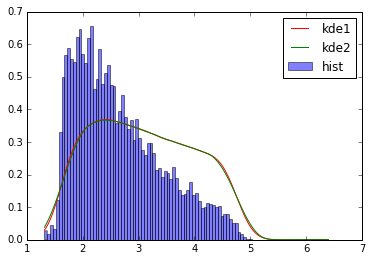

In [24]:
pp.figure(figsize=(6,9))
pp.subplot(211)
pp.hist(data, 100, weights=weights, normed=True, alpha=0.5, label='hist')
pp.plot(x_grid, kde1, color='r', label='kde1')
pp.plot(x_grid, kde2, color='g', label='kde2')
pp.legend(loc='upper right')
pp.show()
#pp.subplot(212)
#pp.hist(random_from_cdf, 50, alpha=0.5, label='from hist')
#pp.hist(random_from_kde, 50, alpha=0.5, label='from kde')
#pp.show()